In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("C:/Users/Owner/Desktop\Miuul/machine_learning/flo_data_unsupirvised/flo_data_20k.csv")

In [3]:
df.head()

,master_id,order_channel,last_order_channel,first_order_date,last_order_date,last_order_date_online,last_order_date_offline,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,interested_in_categories_12
0,cc294636-19f0-11eb-8d74-000d3a38a36f,Android App,Offline,2020-10-30,2021-02-26,2021-02-21,2021-02-26,4.0,1.0,139.99,799.38,[KADIN]
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,Android App,Mobile,2017-02-08,2021-02-16,2021-02-16,2020-01-10,19.0,2.0,159.97,1853.58,"[ERKEK, COCUK, KADIN, AKTIFSPOR]"
2,69b69676-1a40-11ea-941b-000d3a38a36f,Android App,Android App,2019-11-27,2020-11-27,2020-11-27,2019-12-01,3.0,2.0,189.97,395.35,"[ERKEK, KADIN]"
3,1854e56c-491f-11eb-806e-000d3a38a36f,Android App,Android App,2021-01-06,2021-01-17,2021-01-17,2021-01-06,1.0,1.0,39.99,81.98,"[AKTIFCOCUK, COCUK]"
4,d6ea1074-f1f5-11e9-9346-000d3a38a36f,Desktop,Desktop,2019-08-03,2021-03-07,2021-03-07,2019-08-03,1.0,1.0,49.99,159.99,[AKTIFSPOR]


In [18]:
df[["first_order_date", "last_order_date", "last_order_date_online", "last_order_date_offline"]] = pd.to_datetime(df[["first_order_date", "last_order_date", "last_order_date_online", "last_order_date_offline"]].stack()).unstack() 

In [15]:
import datetime as dt
from datetime import datetime

In [22]:
df["last_order_date"].max()

Timestamp('2021-05-30 00:00:00')

In [43]:
today = '2021-05-31'
today = pd.to_datetime(today, format='%Y-%m-%d')

In [26]:
df['tenure'] = (df['last_order_date'] - df['first_order_date'])

In [44]:
df['recency'] = today - df['last_order_date'] 

In [46]:
df['recency']

0        94 days
1       104 days
2       185 days
3       134 days
4        85 days
          ...   
19940   330 days
19941   160 days
19942     7 days
19943   107 days
19944   359 days
Name: recency, Length: 19945, dtype: timedelta64[ns]

In [71]:
df.groupby('master_id')['order_channel'].describe()['top']

master_id
00016786-2f5a-11ea-bb80-000d3a38a36f         Mobile
00034aaa-a838-11e9-a2fc-000d3a38a36f        Desktop
000be838-85df-11ea-a90b-000d3a38a36f    Android App
000c1fe2-a8b7-11ea-8479-000d3a38a36f    Android App
000f5e3e-9dde-11ea-80cd-000d3a38a36f    Android App
                                           ...     
fff1db94-afd9-11ea-b736-000d3a38a36f    Android App
fff4736a-60a4-11ea-8dd8-000d3a38a36f        Ios App
fffacd34-ae14-11e9-a2fc-000d3a38a36f        Ios App
fffacecc-ddc3-11e9-a848-000d3a38a36f    Android App
fffe4b30-18e0-11ea-9213-000d3a38a36f    Android App
Name: top, Length: 19945, dtype: object

In [72]:
df['total_order'] = df['order_num_total_ever_online'] +	df['order_num_total_ever_offline']

In [122]:
new_data = []
for i in df['total_order']: 
    if 5 > i > 0:
        new_data.append(0.20)
    elif 10 > i > 5 :
        new_data.append(0.30)
    elif 15 > i > 10:
        new_data.append(0.50)
    elif 20 > i > 15:
        new_data.append(0.60)
    elif 35 > i > 20:
        new_data.append(0.70)
    elif 50 > i > 35:
        new_data.append(0.80)
    else:
        new_data.append(1)


costomer who purcased products seperate miltification factor added for who order more within customer age with the company.

In [123]:
df['freq_customer'] = new_data

In [77]:
df['freq_order']= df['total_order'].describe()

count    19945.000000
mean         5.024768
std          4.742707
min          2.000000
25%          3.000000
50%          4.000000
75%          6.000000
max        202.000000
Name: total_order, dtype: float64

In [74]:
df['total_costumer_value'] = df['customer_value_total_ever_offline'] +df['customer_value_total_ever_online']

In [78]:
import matplotlib.pyplot as plt

{'whiskers': [<matplotlib.lines.Line2D at 0x1af164ae730>,
 'caps': [<matplotlib.lines.Line2D at 0x1af164b6520>,
 'boxes': [<matplotlib.lines.Line2D at 0x1af164aec10>],
 'medians': [<matplotlib.lines.Line2D at 0x1af164b6ac0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1af164b6d90>],
 'means': []}

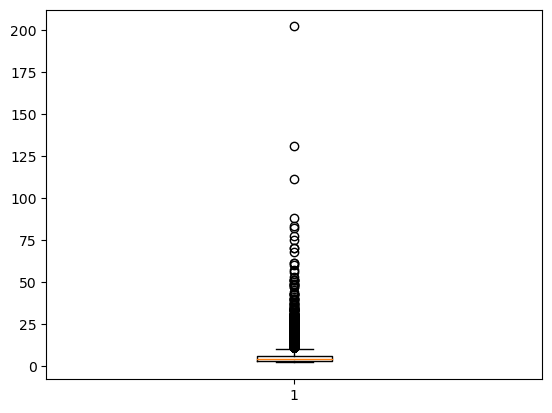

In [102]:
plt.boxplot(df['total_order'])

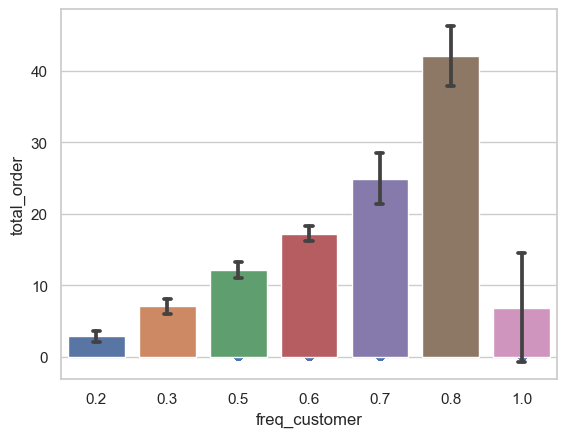

In [125]:
plt.scatter(df['total_order'], df['freq_customer'])
import seaborn as sns, matplotlib.pyplot as plt
sns.set(style="whitegrid")
sns.barplot(x=df['freq_customer'], y=df['total_order'], data=df, capsize=.1, ci="sd")

plt.show()

In [126]:
from sklearn import preprocessing

In [138]:
df.head()

,master_id,order_channel,last_order_channel,first_order_date,last_order_date,last_order_date_online,last_order_date_offline,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,interested_in_categories_12,tenure,recency,total_order,total_costumer_value,freq_customer
0,cc294636-19f0-11eb-8d74-000d3a38a36f,Android App,Offline,2020-10-30,2021-02-26,2021-02-21,2021-02-26,4.0,1.0,139.99,799.38,[KADIN],119,94,5.0,939.37,1.0
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,Android App,Mobile,2017-02-08,2021-02-16,2021-02-16,2020-01-10,19.0,2.0,159.97,1853.58,"[ERKEK, COCUK, KADIN, AKTIFSPOR]",1469,104,21.0,2013.55,0.7
2,69b69676-1a40-11ea-941b-000d3a38a36f,Android App,Android App,2019-11-27,2020-11-27,2020-11-27,2019-12-01,3.0,2.0,189.97,395.35,"[ERKEK, KADIN]",366,185,5.0,585.32,1.0
3,1854e56c-491f-11eb-806e-000d3a38a36f,Android App,Android App,2021-01-06,2021-01-17,2021-01-17,2021-01-06,1.0,1.0,39.99,81.98,"[AKTIFCOCUK, COCUK]",11,134,2.0,121.97,0.2
4,d6ea1074-f1f5-11e9-9346-000d3a38a36f,Desktop,Desktop,2019-08-03,2021-03-07,2021-03-07,2019-08-03,1.0,1.0,49.99,159.99,[AKTIFSPOR],582,85,2.0,209.98,0.2


In [135]:
df['tenure'] = df['tenure'].dt.days

In [137]:
df['recency'] = df['recency'].dt.days

In [161]:
dff =pd.get_dummies(df[["order_channel", "last_order_channel", "interested_in_categories_12"]])

In [162]:
dff.head()

,order_channel_Android App,order_channel_Desktop,order_channel_Ios App,order_channel_Mobile,last_order_channel_Android App,last_order_channel_Desktop,last_order_channel_Ios App,last_order_channel_Mobile,last_order_channel_Offline,"interested_in_categories_12_[AKTIFCOCUK, AKTIFSPOR]",...,"interested_in_categories_12_[ERKEK, COCUK, AKTIFSPOR]","interested_in_categories_12_[ERKEK, COCUK, KADIN, AKTIFSPOR]","interested_in_categories_12_[ERKEK, COCUK, KADIN]","interested_in_categories_12_[ERKEK, COCUK]","interested_in_categories_12_[ERKEK, KADIN, AKTIFSPOR]","interested_in_categories_12_[ERKEK, KADIN]",interested_in_categories_12_[ERKEK],"interested_in_categories_12_[KADIN, AKTIFSPOR]",interested_in_categories_12_[KADIN],interested_in_categories_12_[]
0,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
1,1,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
2,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [163]:
df_drop = df.drop(columns=["master_id", "order_channel", "last_order_channel", "interested_in_categories_12", 
                           "first_order_date", "last_order_date", "last_order_date_online", "last_order_date_offline"], axis= 1)

In [164]:
df_drop.head()

,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,tenure,recency,total_order,total_costumer_value,freq_customer
0,4.0,1.0,139.99,799.38,119,94,5.0,939.37,1.0
1,19.0,2.0,159.97,1853.58,1469,104,21.0,2013.55,0.7
2,3.0,2.0,189.97,395.35,366,185,5.0,585.32,1.0
3,1.0,1.0,39.99,81.98,11,134,2.0,121.97,0.2
4,1.0,1.0,49.99,159.99,582,85,2.0,209.98,0.2


In [167]:
df_new = pd.concat([df_drop, dff], axis = 1 )

In [168]:
df_new.head()

,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,tenure,recency,total_order,total_costumer_value,freq_customer,order_channel_Android App,...,"interested_in_categories_12_[ERKEK, COCUK, AKTIFSPOR]","interested_in_categories_12_[ERKEK, COCUK, KADIN, AKTIFSPOR]","interested_in_categories_12_[ERKEK, COCUK, KADIN]","interested_in_categories_12_[ERKEK, COCUK]","interested_in_categories_12_[ERKEK, KADIN, AKTIFSPOR]","interested_in_categories_12_[ERKEK, KADIN]",interested_in_categories_12_[ERKEK],"interested_in_categories_12_[KADIN, AKTIFSPOR]",interested_in_categories_12_[KADIN],interested_in_categories_12_[]
0,4.0,1.0,139.99,799.38,119,94,5.0,939.37,1.0,1,...,0,0,0,0,0,0,0,0,1,0
1,19.0,2.0,159.97,1853.58,1469,104,21.0,2013.55,0.7,1,...,0,1,0,0,0,0,0,0,0,0
2,3.0,2.0,189.97,395.35,366,185,5.0,585.32,1.0,1,...,0,0,0,0,0,1,0,0,0,0
3,1.0,1.0,39.99,81.98,11,134,2.0,121.97,0.2,1,...,0,0,0,0,0,0,0,0,0,0
4,1.0,1.0,49.99,159.99,582,85,2.0,209.98,0.2,0,...,0,0,0,0,0,0,0,0,0,0


In [175]:
scaler = preprocessing.MinMaxScaler([0,1])
df_scaled = scaler.fit_transform(df_new)
df_scaled = pd.DataFrame(df_scaled)

In [176]:
df_scaled.head()

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,0.015075,0.000000,0.007178,0.017395,0.039222,0.254795,0.015,0.019503,1.000,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.090452,0.009259,0.008281,0.040715,0.484179,0.282192,0.095,0.042926,0.625,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.010050,0.009259,0.009938,0.008458,0.120633,0.504110,0.015,0.011782,1.000,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.000000,0.000000,0.001656,0.001526,0.003626,0.364384,0.000,0.001679,0.000,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.000000,0.002208,0.003252,0.191826,0.230137,0.000,0.003598,0.000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [178]:
pip install yellowbrick

     ------------------------------------ 282.6/282.6 kB 830.4 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [179]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.preprocessing import LabelEncoder

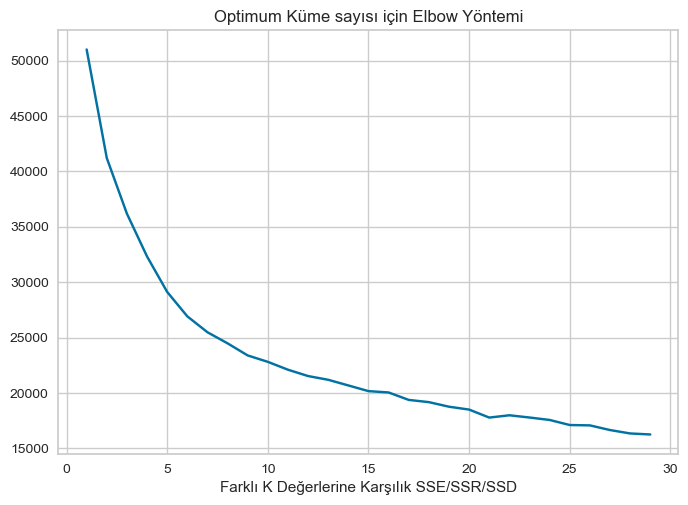

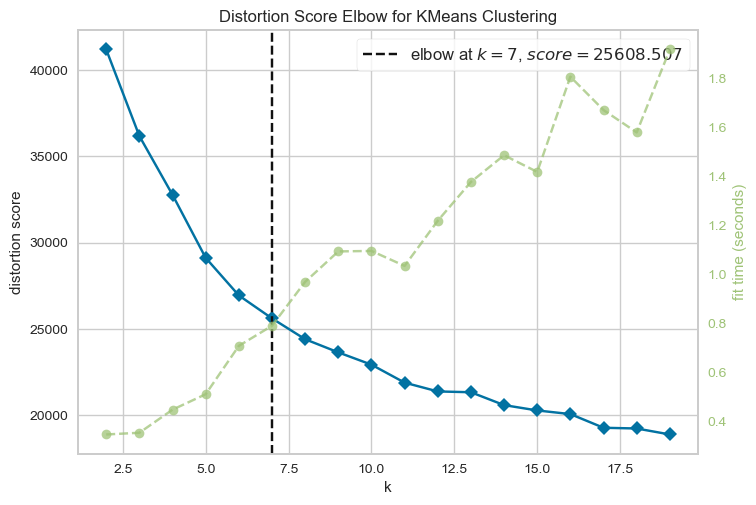

7

In [182]:
################################
# Optimum Küme Sayısının Belirlenmesi
################################

kmeans = KMeans()
ssd = []
K = range(1, 30)

for k in K:
    kmeans = KMeans(n_clusters=k).fit(df_scaled)
    ssd.append(kmeans.inertia_)

plt.plot(K, ssd, "bx-")
plt.xlabel("Farklı K Değerlerine Karşılık SSE/SSR/SSD")
plt.title("Optimum Küme sayısı için Elbow Yöntemi")
plt.show()

kmeans = KMeans()
elbow = KElbowVisualizer(kmeans, k=(2, 20))
elbow.fit(df_scaled)
elbow.show()

elbow.elbow_value_

In [250]:
################################
# Final Cluster'ların Oluşturulması
################################

kmeans = KMeans(n_clusters=elbow.elbow_value_).fit(df_scaled)

kmeans.n_clusters
kmeans.cluster_centers_
kmeans.labels_
df_scaled[0:5]

clusters_kmeans = kmeans.labels_

In [257]:
data  = kmeans.cluster_centers_

In [262]:
data

array([[ 1.35366258e-02,  6.81806788e-03,  1.13565692e-02,
         1.30368978e-02,  1.95143911e-01,  3.29868123e-01,
         1.71506994e-02,  1.68562264e-02,  2.08452399e-01,
         1.00000000e+00, -3.46944695e-15,  4.21884749e-15,
        -5.55111512e-15,  1.00000000e+00,  3.19189120e-16,
        -1.81799020e-15, -3.83026943e-15,  2.44249065e-15,
         1.75966311e-02,  1.53406527e-02,  1.21822831e-02,
         8.57271770e-03,  1.91006166e-02,  1.03775004e-02,
         8.57271770e-03,  1.56414498e-02,  6.61753647e-03,
         7.67032636e-03,  9.47510904e-03,  4.66235524e-03,
         1.00767033e-02,  9.92630471e-03,  7.82072492e-03,
         3.11325011e-02,  1.77169499e-01,  1.63934426e-02,
         1.24830802e-02,  1.74462325e-02,  3.12828997e-02,
         7.02361257e-02,  9.77590615e-03,  1.36862686e-02,
         1.05278989e-02,  1.41374643e-02,  4.07580087e-02,
         3.57948564e-02,  1.08888555e-01,  5.85050384e-02,
         7.59512709e-02,  1.12197323e-01],
       [ 7.08

In [251]:
labels  = kmeans.labels_

In [253]:
centers = kmeans.cluster_centers_

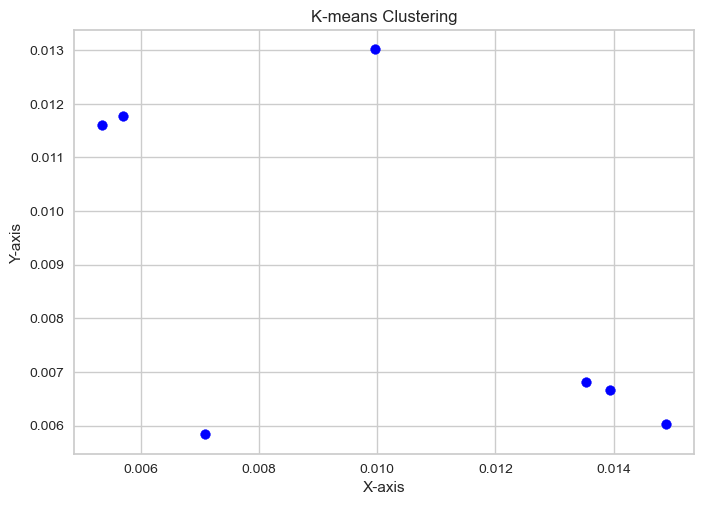

In [267]:
cmap = plt.cm.get_cmap('tab10', len(np.unique(labels)))

# Plot the data points with different colors for each cluster
#plt.scatter(data[:, 0], data[:, 1], c =labels, cmap = cmap )
plt.scatter(centers[:, 0], centers[:, 1], c='blue', marker='o')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('K-means Clustering')
plt.show()